# LOG TRANSFORMATION


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def log_transform(image, c=1):
    img_float = image.astype(np.float64)
    output_image = c * np.log(1 + img_float)
    output_image -= output_image.min()
    output_image /= output_image.max()
    output_image *= 255
    return output_image.astype(np.uint8)

In [ ]:
def plot_image_and_histogram(image, title, ax_image, ax_hist):
    ax_image.imshow(image, cmap='gray')
    ax_image.axis('on')
    ax_image.set_title(title)
    ax_hist.hist(image.ravel(), bins=256, color='blue', alpha=0.75)
    ax_hist.set_xlim([0, 256])
    ax_hist.set_title("Histogram")

In [ ]:
image_path = '/content/drive/MyDrive/Digital-Image-Processing/img4.jpg'
original_image = np.array(Image.open(image_path).convert('L'))

In [ ]:
c = 255 / np.log(1 + np.max(original_image))
transformed_image = log_transform(original_image, c)

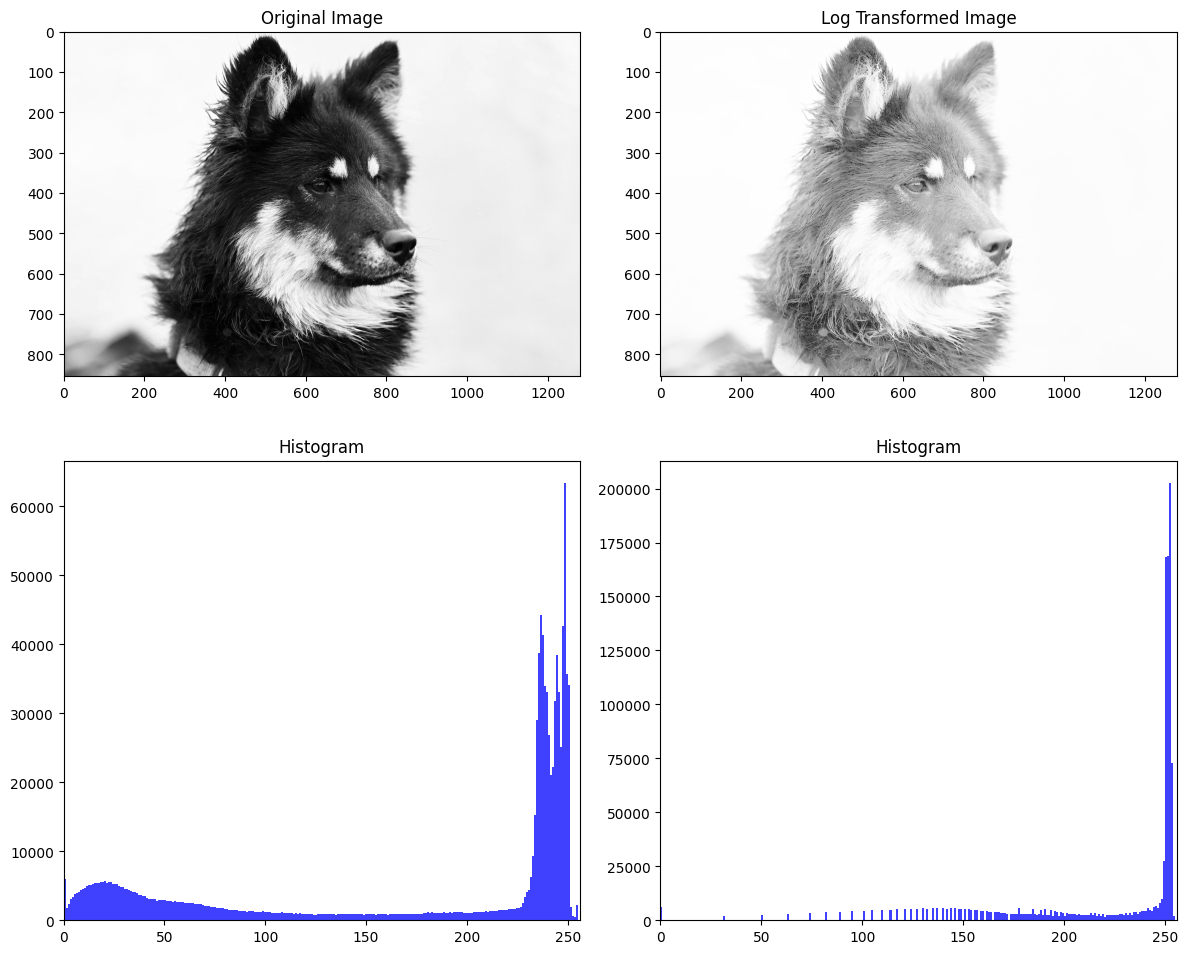

In [ ]:
if transformed_image.ndim == 2:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    plot_image_and_histogram(original_image, 'Original Image', axs[0, 0], axs[1, 0])
    plot_image_and_histogram(transformed_image, 'Log Transformed Image', axs[0, 1], axs[1, 1])

    plt.tight_layout()
    plt.show()
else:
    print("Unexpected image dimensions:", transformed_image.shape)

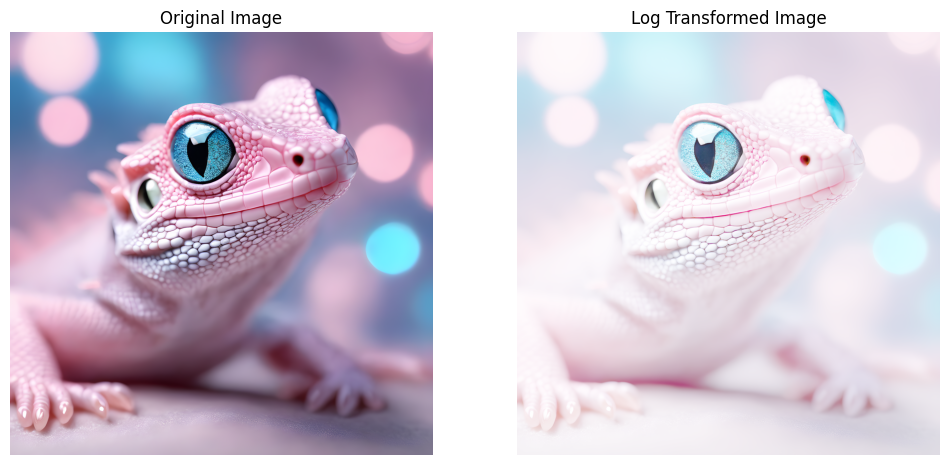

In [ ]:
def log_transform_rgb(image, c=1):
    img_float = image.astype(np.float64)
    transformed = c * np.log(1 + img_float)
    transformed -= transformed.min()
    transformed /= transformed.max()
    transformed *= 255
    return transformed.astype(np.uint8)

original_image = np.array(Image.open(image_path))
c = 255 / np.log(1 + np.max(original_image))
transformed_image = log_transform_rgb(original_image, c)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(transformed_image)
axs[1].set_title('Log Transformed Image')
axs[1].axis('off')

plt.show()


# POWER-LAW(GAMMA) TRANSFORMATION


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
def gamma_transform(image, gamma, c=1):
    img_normalized = image / 255.0
    gamma_corrected = c * np.power(img_normalized, gamma)
    gamma_corrected = np.clip(gamma_corrected * 255, 0, 255)
    return gamma_corrected.astype(np.uint8)

In [67]:
image_path = '/content/drive/MyDrive/Digital-Image-Processing/img4.jpg'
original_image = np.array(Image.open(image_path))

In [68]:
gamma_values = [0.2,0.5,2,5]

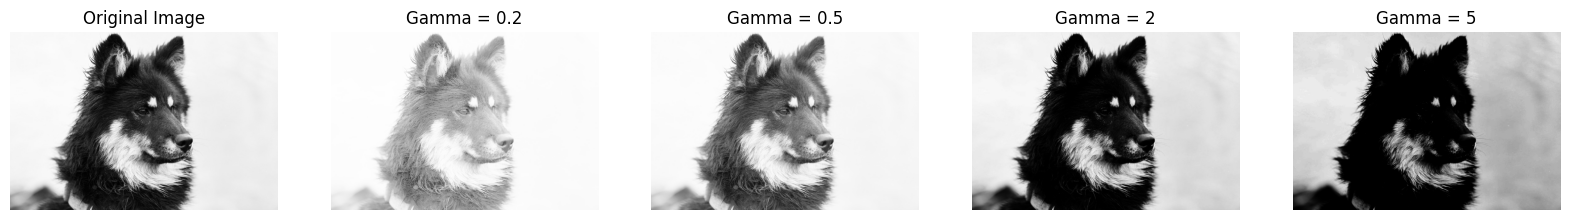

In [69]:
fig, axs = plt.subplots(1, len(gamma_values) + 1, figsize=(20, 5))
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

for i, gamma in enumerate(gamma_values, 1):
    transformed_image = gamma_transform(original_image, gamma)
    axs[i].imshow(transformed_image)
    axs[i].set_title(f'Gamma = {gamma}')
    axs[i].axis('off')

plt.show()